In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import warnings
from matplotlib import font_manager

df = pd.read_csv('../stats.csv')
df.drop(columns=["avg_swing_speed", "fast_swing_rate", "blasts_contact", "blasts_swing", "squared_up_contact", "squared_up_swing", "avg_swing_length", "swords", "on_base_plus_slg", "woba", "slg_percent", "on_base_percent", "xba", "xwoba", "xslg", "xiso", "xobp"], inplace=True)

print(df[['batting_avg']].describe())

       batting_avg
count  1233.000000
mean      0.265249
std       0.028643
min       0.168000
25%       0.247000
50%       0.264000
75%       0.283000
max       0.364000


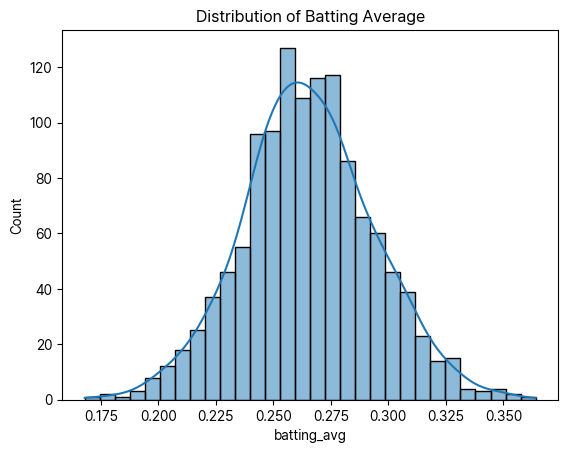

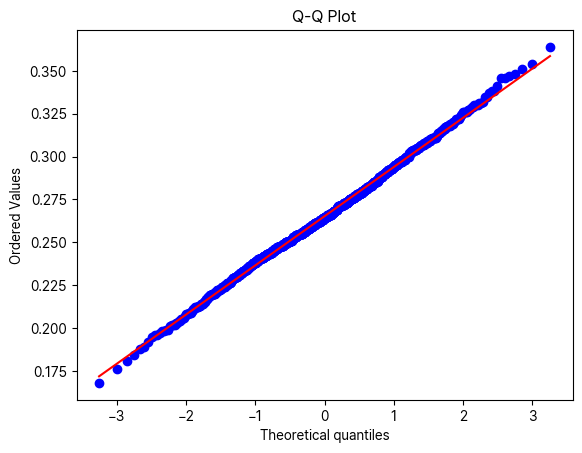

Shapiro-Wilk: 0.9984, p-value: 0.2980


In [2]:
plt.rcParams['font.family'] = 'Pretendard'

sns.histplot(df['batting_avg'], kde=True)
plt.title('Distribution of Batting Average')
plt.show()

stats.probplot(df['batting_avg'], dist='norm', plot=plt)
plt.title('Q-Q Plot')
plt.show()

stat_batting, p_value_batting = stats.shapiro(df['batting_avg'])
print(f'Shapiro-Wilk: {stat_batting:.4f}, p-value: {p_value_batting:.4f}')

In [3]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
correlations = df[numeric_cols].corr()['batting_avg'].sort_values(ascending=False)
correlations.drop(index='batting_avg', inplace=True)

# Correlation
print('타율과의 상관관계:')
print(correlations)

타율과의 상관관계:
babip                 0.775256
single                0.511598
hit                   0.501774
double                0.386474
r_run                 0.344208
sweet_spot_percent    0.265662
b_rbi                 0.240137
triple                0.160704
ab                    0.156569
pa                    0.144747
b_foul                0.139935
exit_velocity_avg     0.112334
home_run              0.106695
swing_percent         0.105041
hard_hit_percent      0.065715
avg_hyper_speed       0.065145
sprint_speed          0.061036
avg_best_speed        0.050635
walk                  0.022523
player_age           -0.039343
barrel_batted_rate   -0.048288
player_id            -0.084931
bb_percent           -0.087086
b_swinging_strike    -0.153629
year                 -0.164469
strikeout            -0.253091
launch_angle_avg     -0.254540
whiff_percent        -0.352481
k_percent            -0.470101
Name: batting_avg, dtype: float64


In [4]:
corr_top10 = correlations.head(10)
corr_bottom10 = correlations.tail(10)

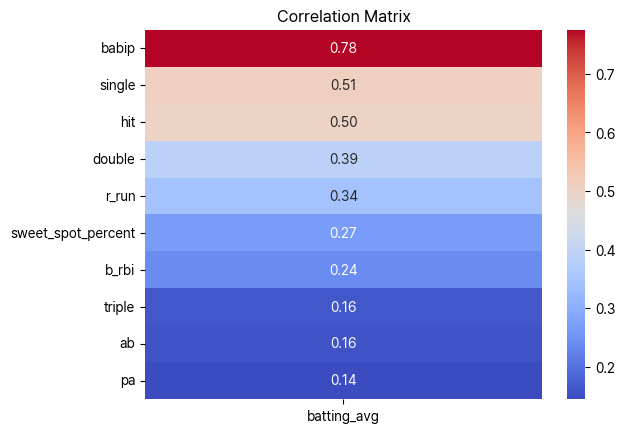

In [5]:
# Correlation matrix
sns.heatmap(corr_top10.to_frame(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [10]:
X = df[corr_top10.index]
y = df['batting_avg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print('성능:')
print(f'RMSE: {rmse:.2f}')
print(f'R2 Score: {r2:.2f}')
print(f'Adjusted R2: {adjusted_r2:.2f}')
print()

df['predicted'] = model.predict(df[corr_top10.index])
df['diff'] = df['batting_avg'] - df['predicted']
df[['last_name', 'first_name']] = df['last_name, first_name'].str.split(', ', expand=True)
df['player_name'] = df['last_name'] + ', ' + df['first_name']
expected_batting_avg_table = df[['player_name', 'batting_avg', 'predicted', 'diff']].round({'predicted': 3, 'diff': 3})

print('Expected Batting Averages for Players(Top 10):')
print(expected_batting_avg_table.sort_values(by='predicted', ascending=False).head(10))

성능:
RMSE: 0.01
R2 Score: 0.93
Adjusted R2: 0.93

Expected Batting Averages for Players(Top 10):
            player_name  batting_avg  predicted   diff
1032       Arraez, Luis        0.354      0.358 -0.004
206        Altuve, Jose        0.346      0.353 -0.007
83         LeMahieu, DJ        0.348      0.352 -0.004
75         Altuve, Jose        0.338      0.349 -0.011
1042  Acuña Jr., Ronald        0.337      0.348 -0.011
973    Freeman, Freddie        0.331      0.346 -0.015
174   Blackmon, Charlie        0.331      0.345 -0.014
72       Murphy, Daniel        0.347      0.345  0.002
400       Betts, Mookie        0.346      0.344  0.002
1203    Witt Jr., Bobby        0.332      0.344 -0.012


In [7]:
ohtani = df[df['last_name, first_name'].str.contains('Ohtani')]
ohtani

,"last_name, first_name",player_id,year,player_age,ab,pa,hit,single,double,triple,...,avg_best_speed,avg_hyper_speed,whiff_percent,swing_percent,sprint_speed,predicted,diff,last_name,first_name,player_name
811,"Ohtani, Shohei",660271,2021,26,537,639,138,58,26,8,...,105.900177,97.802022,35.1,45.8,28.8,0.258162,-0.001162,Ohtani,Shohei,"Ohtani, Shohei"
933,"Ohtani, Shohei",660271,2022,27,586,666,160,90,30,6,...,103.823624,96.520364,28.1,49.3,28.2,0.275603,-0.002603,Ohtani,Shohei,"Ohtani, Shohei"
1041,"Ohtani, Shohei",660271,2023,28,497,599,151,73,26,8,...,105.748559,97.769058,32.3,48.2,27.8,0.302900,0.001100,Ohtani,Shohei,"Ohtani, Shohei"
1157,"Ohtani, Shohei",660271,2024,29,636,731,197,98,38,7,...,106.727792,98.772122,29.8,47.3,28.1,0.319164,-0.009164,Ohtani,Shohei,"Ohtani, Shohei"
